# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import requests
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
#from config import api_key
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

In [15]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [16]:
response

{'coord': {'lon': 112.3825, 'lat': 24.7811},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 37.98,
  'feels_like': 34.92,
  'temp_min': 37.98,
  'temp_max': 37.98,
  'pressure': 1023,
  'humidity': 95,
  'sea_level': 1023,
  'grnd_level': 1009},
 'visibility': 10000,
 'wind': {'speed': 4.07, 'deg': 1, 'gust': 8.32},
 'rain': {'1h': 0.13},
 'clouds': {'all': 100},
 'dt': 1643478627,
 'sys': {'country': 'CN', 'sunrise': 1643498024, 'sunset': 1643537608},
 'timezone': 28800,
 'id': 1803841,
 'name': 'Lianzhou',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [17]:
# Google API Key
#from config import gkey

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
#query_url = url + "api-key=" + api_key + "&q=" + query


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : tommot
Processing Record 2 of Set 1 : punta arenas
City not found. Skipping...
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : bose
Processing Record 5 of Set 1 : provideniya
Processing Record 6 of Set 1 : westport
City not found. Skipping...
Processing Record 7 of Set 1 : mandalgovi
Processing Record 8 of Set 1 : bredasdorp
Processing Record 9 of Set 1 : paamiut
Processing Record 10 of Set 1 : new norfolk
Processing Record 11 of Set 1 : takoradi
City not found. Skipping...
Processing Record 12 of Set 1 : salta
Processing Record 13 of Set 1 : prince rupert
Processing Record 14 of Set 1 : alappuzha
Processing Record 15 of Set 1 : tacuarembo
City not found. Skipping...
Processing Record 16 of Set 1 : tuatapere
Processing Record 17 of Set 1 : tete
City not found. Skipping...
Processing Record 18 of Set 1 : pahrump
Processing Record 19 of Set 1 : ushuaia
Processing Record 20 of Set 

Processing Record 33 of Set 4 : gayny
Processing Record 34 of Set 4 : port-gentil
Processing Record 35 of Set 4 : melaka
Processing Record 36 of Set 4 : linxia
Processing Record 37 of Set 4 : cotonou
Processing Record 38 of Set 4 : lavrentiya
Processing Record 39 of Set 4 : pevek
Processing Record 40 of Set 4 : trincomalee
Processing Record 41 of Set 4 : taraza
Processing Record 42 of Set 4 : carutapera
Processing Record 43 of Set 4 : upata
Processing Record 44 of Set 4 : pocao de pedras
Processing Record 45 of Set 4 : puerto leguizamo
Processing Record 46 of Set 4 : birur
Processing Record 47 of Set 4 : bambous virieux
Processing Record 48 of Set 4 : talnakh
Processing Record 49 of Set 4 : umm lajj
Processing Record 50 of Set 4 : ibiapina
Processing Record 0 of Set 5 : monrovia
Processing Record 1 of Set 5 : harbour breton
Processing Record 2 of Set 5 : severo-kurilsk
Processing Record 3 of Set 5 : minas
Processing Record 4 of Set 5 : ancud
Processing Record 5 of Set 5 : cidreira
Proc

KeyboardInterrupt: 

In [18]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list, 
                "Country" : country_list,
                "Date" : date_list,
                               
})


In [19]:
# Count data
weather_dict.count()

City          226
Lat           226
Lng           226
Max Temp      226
Humidity      226
Cloudiness    226
Wind Speed    226
Country       226
Date          226
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# Save city data into a csv file
weather_dict.to_csv("output_data_file")

In [27]:
#Display the Data Frame
weather_dict

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tommot,58.9564,126.2925,-1.77,91,100,7.36,RU,1643607166
1,Punta Arenas,-53.1500,-70.9167,48.31,71,40,23.02,CL,1643606904
2,Rikitea,-23.1203,-134.9692,77.27,63,100,5.53,PF,1643607167
3,Bose,45.4612,8.0137,40.21,75,7,1.90,IT,1643607168
4,Provideniya,64.3833,-173.3000,6.40,80,77,12.68,RU,1643606881
...,...,...,...,...,...,...,...,...,...
221,Touros,-5.1989,-35.4608,79.70,81,16,12.06,BR,1643607206
222,Vao,-22.6667,167.4833,79.72,78,56,2.80,NC,1643607283
223,South Charleston,38.3684,-81.6996,27.41,83,20,0.00,US,1643607110
224,Statesboro,32.4488,-81.7832,45.93,61,0,4.61,US,1643607284


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

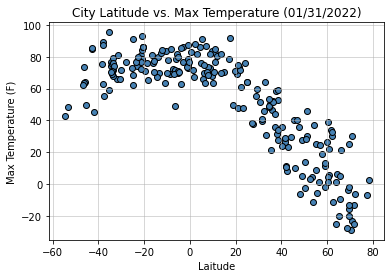

In [31]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/31/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

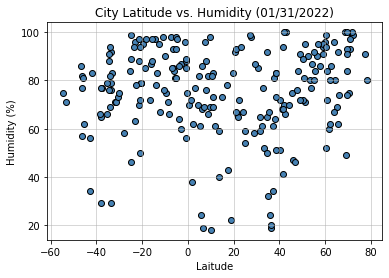

In [32]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/31/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

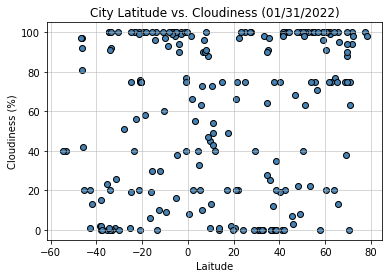

In [33]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/31/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

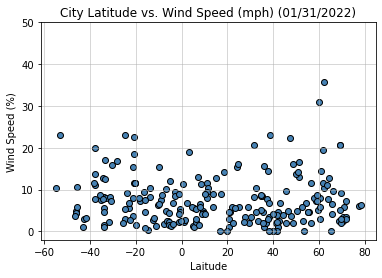

In [34]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/31/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [36]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [37]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.32


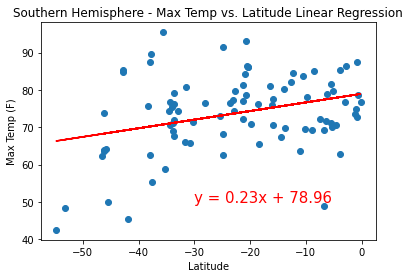

In [40]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.9


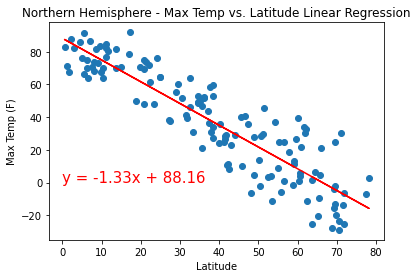

In [41]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.33


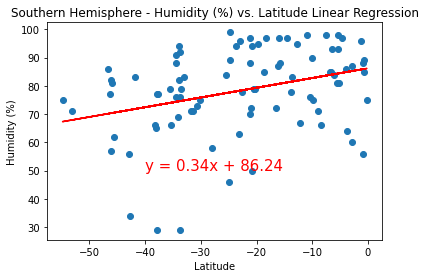

In [42]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.35


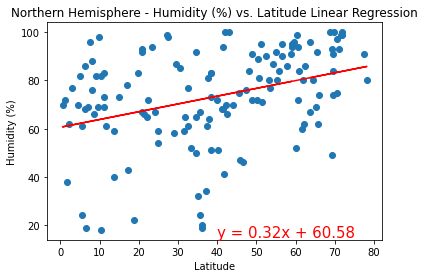

In [43]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.4


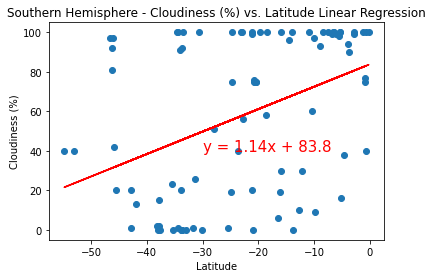

In [44]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.31


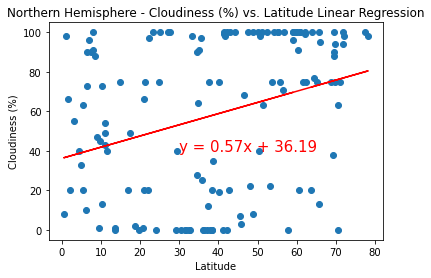

In [45]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.23


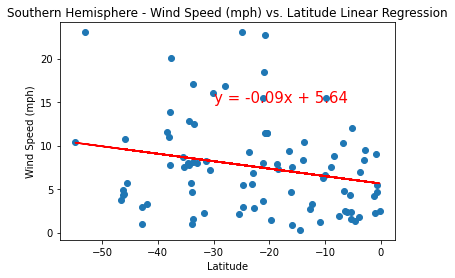

In [46]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")